# Analysis

 ### Observed Trend 1: On August 28, 2018 overall sentiment polarity is positive for BBC and CBS tweets, negative polarity for CNN and Fox News. 
 ### Observed Trend 2:  The NY Times is close to neutral compared to the other four media outlet tweets.
 ### Observed Trend 3: Based on the maximum positive (+4) and maximum negative (-4) limits sets by Vader analysis CBS is most positve at 19% followed by BBC ~14%.
 ### Observed Trend 4: Based on the minimum positive (+1) and min negative (-1) limits sets by Vader analysis, CNN is slightly negative at ~ -6% followed by Fox News at ~-5%.


In [7]:
# Dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import json
import tweepy
import time
from datetime import datetime
from config1 import consumer_key, consumer_secret, access_token, access_token_secret

# Initialize Sentiment Analyzer
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()


# Setup Tweepy API Authentication
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())

# Get sentiments data from Media Tweets and creat dataframe

In [8]:
# Target Search Term
target_terms = ("BBC", "CBS", "CNN",
                "FoxNews", "nytimes")


In [9]:
# Array to hold sentiment
sentiments_all = []
# Counter
counter = 1


In [10]:
# Loop through all target users
for target in target_terms:

    # Variables for holding sentiments
    compound_list = []
    positive_list = []
    negative_list = []
    neutral_list = []
    for x in range(5):

        # Get all tweets from home feed
        public_tweets = api.user_timeline(target, page=x)
        # Loop through all tweets 
        for tweet in public_tweets:
        
            # Run Vader Analysis on each tweet
            compound = analyzer.polarity_scores(tweet["text"])["compound"]
            pos = analyzer.polarity_scores(tweet["text"])["pos"]
            neu = analyzer.polarity_scores(tweet["text"])["neu"]
            neg = analyzer.polarity_scores(tweet["text"])["neg"]
            tweets_ago = counter
            
            compound_list.append(compound)
            positive_list.append(pos)
            negative_list.append(neg)
            neutral_list.append(neu)


            # Add sentiments for each tweet into an array
            sentiments_all.append({"User": target, 
                           "Source account": tweet["source"],
                           "Date": tweet["created_at"],        
                           "Text": tweet["text"],
                           "Compound": compound,
                           "Positive": pos,
                           "Negative": neu,
                           "Neutral": neg,
                           "Tweets Ago": counter})
            
            
            # Add to counter 
            counter = counter + 1
    
    

print(sentiments_all)
print("")


TweepError: [{'code': 89, 'message': 'Invalid or expired token.'}]

In [5]:
# Convert sentiments to DataFrame
sentiments_pd = pd.DataFrame.from_dict(sentiments_all)
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Source account,Text,Tweets Ago,User
0,0.0000,Tue Aug 28 18:56:05 +0000 2018,1.000,0.000,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",🐢 Scientists have found new evidence confirmin...,1,BBC
1,0.5423,Tue Aug 28 18:03:04 +0000 2018,0.780,0.000,0.220,"<a href=""http://www.socialflow.com"" rel=""nofol...",A conversation with a homeless man inspired St...,2,BBC
2,0.0000,Tue Aug 28 16:01:02 +0000 2018,1.000,0.000,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",😂 If Britney's songs were Scottish. https://t....,3,BBC
3,0.5994,Tue Aug 28 14:51:38 +0000 2018,0.795,0.000,0.205,"<a href=""https://about.twitter.com/products/tw...",RT @BBCOne: Be careful who you trust.\n\n#Body...,4,BBC
4,0.3612,Tue Aug 28 14:51:32 +0000 2018,0.848,0.000,0.152,"<a href=""https://about.twitter.com/products/tw...",RT @BBCiPlayer: Watch the highlights from Read...,5,BBC
5,0.0000,Tue Aug 28 13:02:04 +0000 2018,1.000,0.000,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...","Once upon a time, two early humans of differen...",6,BBC
6,0.0000,Tue Aug 28 12:48:59 +0000 2018,1.000,0.000,0.000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",@BBCTravelShow is on @BBCiPlayer now 👉 https:/...,7,BBC
7,0.4767,Tue Aug 28 12:00:18 +0000 2018,0.728,0.000,0.272,"<a href=""http://www.socialflow.com"" rel=""nofol...",🍅 Neighbourhood gardens are providing importan...,8,BBC
8,0.8316,Tue Aug 28 11:33:00 +0000 2018,0.630,0.000,0.370,"<a href=""https://studio.twitter.com"" rel=""nofo...","This sweet, sticky rice is hit 100 times with ...",9,BBC
9,-0.2960,Tue Aug 28 11:01:01 +0000 2018,0.896,0.104,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",🍯 Honey and over-the-counter meds should be th...,10,BBC


In [6]:
# ensure each news source has 100 tweets. There are five sources and each has 100 values
sentiments_pd.count()

Compound          500
Date              500
Negative          500
Neutral           500
Positive          500
Source account    500
Text              500
Tweets Ago        500
User              500
dtype: int64

In [7]:
sentiments_pd= sentiments_pd.set_index("User")
sentiments_pd.head()

,Compound,Date,Negative,Neutral,Positive,Source account,Text,Tweets Ago
User,,,,,,,,
BBC,0.0000,Tue Aug 28 18:56:05 +0000 2018,1.000,0.0,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",🐢 Scientists have found new evidence confirmin...,1
BBC,0.5423,Tue Aug 28 18:03:04 +0000 2018,0.780,0.0,0.220,"<a href=""http://www.socialflow.com"" rel=""nofol...",A conversation with a homeless man inspired St...,2
BBC,0.0000,Tue Aug 28 16:01:02 +0000 2018,1.000,0.0,0.000,"<a href=""http://www.socialflow.com"" rel=""nofol...",😂 If Britney's songs were Scottish. https://t....,3
BBC,0.5994,Tue Aug 28 14:51:38 +0000 2018,0.795,0.0,0.205,"<a href=""https://about.twitter.com/products/tw...",RT @BBCOne: Be careful who you trust.\n\n#Body...,4
BBC,0.3612,Tue Aug 28 14:51:32 +0000 2018,0.848,0.0,0.152,"<a href=""https://about.twitter.com/products/tw...",RT @BBCiPlayer: Watch the highlights from Read...,5


# Save the DataFrame as a csv

In [8]:
sentiments_pd.to_csv("../dataoutput/media_sentiments_analysis.csv", encoding="utf-8", index=False)



# Sentiment Analysis of Media Tweets

In [9]:
BBC_compound = sentiments_pd.loc["BBC", "Compound"]
CBS_compound = sentiments_pd.loc["CBS", "Compound"] 
CNN_compound = sentiments_pd.loc["CNN", "Compound"] 
Fox_compound = sentiments_pd.loc["FoxNews", "Compound"] 
nytimes_compound = sentiments_pd.loc["nytimes", "Compound"] 
BBC_compound =BBC_compound.reset_index()
CBS_compound =CBS_compound.reset_index()
CNN_compound =CNN_compound.reset_index()
Fox_compound =Fox_compound.reset_index()
nytimes_compound =nytimes_compound.reset_index()


In [10]:
Compound_df=pd.concat([BBC_compound, CBS_compound, CNN_compound, Fox_compound,nytimes_compound],axis=1)
Compound_df
Compound_df.columns.values[1] = 'BBC Compound' 
Compound_df.columns.values[3] = 'CBS Compound'
Compound_df.columns.values[5] = 'CNN Compound'
Compound_df.columns.values[7] = 'FoxNews Compound'
Compound_df.columns.values[9] = 'NYtimes Compound'
Compound_df.head()

,User,BBC Compound,User,CBS Compound,User,CNN Compound,User,FoxNews Compound,User,NYtimes Compound
0,BBC,0.0000,CBS,0.0000,CNN,0.0000,FoxNews,0.0258,nytimes,-0.2023
1,BBC,0.5423,CBS,-0.4389,CNN,0.0000,FoxNews,-0.5267,nytimes,0.7004
2,BBC,0.0000,CBS,0.0000,CNN,-0.5423,FoxNews,-0.1779,nytimes,0.3254
3,BBC,0.5994,CBS,0.0000,CNN,0.4215,FoxNews,0.0000,nytimes,0.0000
4,BBC,0.3612,CBS,0.5423,CNN,0.0000,FoxNews,0.0258,nytimes,0.0000


# Create plot

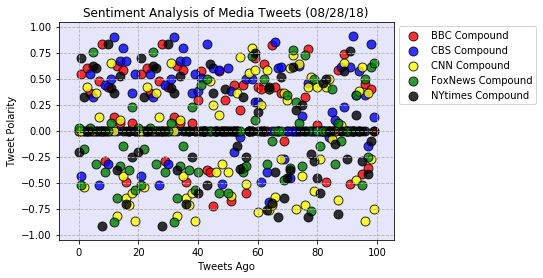

In [11]:

mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_facecolor('lavender')
BBC = ax.scatter(np.arange(len(Compound_df["BBC Compound"])),
         Compound_df["BBC Compound"], marker="o", color="red", edgecolors="k",
         alpha=0.8, s=80 ) 
CBS = ax.scatter(np.arange(len(Compound_df["BBC Compound"])),
         Compound_df["CBS Compound"], marker="o", color="blue", edgecolors="k",
         alpha=0.8,s=80)
CNN = ax.scatter(np.arange(len(Compound_df["BBC Compound"])),
         Compound_df["CNN Compound"], marker="o", color="yellow", edgecolors="k",
         alpha=0.8 ,s=80)
Fox = ax.scatter(np.arange(len(Compound_df["BBC Compound"])),
         Compound_df["FoxNews Compound"], marker="o", color="green", edgecolors="k",
         alpha=0.8,s=80)
nytimes = ax.scatter(np.arange(len(Compound_df["BBC Compound"])),
         Compound_df["NYtimes Compound"], marker="o", color="black", edgecolors="k",
         alpha=0.8,s=80)
# # Incorporate the other graph properties

plt.title("Sentiment Analysis of Media Tweets (08/28/18)")
plt.ylabel("Tweet Polarity")
plt.xlabel("Tweets Ago")
plt.grid(True, linestyle='dashed')
plt.legend((BBC, CBS, CNN, Fox, nytimes), ("BBC Compound","CBS Compound","CNN Compound","FoxNews Compound","NYtimes Compound"),
           loc='lower left',
           bbox_to_anchor=(1, 0.6))
plt.savefig("Sentiment_Analysis_of_Media_Tweets_08_28_2018")     
plt.show()

In [12]:
average_BBC = Compound_df["BBC Compound"].mean()
average_CBS = Compound_df["CBS Compound"].mean()
average_CNN = Compound_df["CNN Compound"].mean()
average_Fox = Compound_df["FoxNews Compound"].mean()
average_nytimes = Compound_df["NYtimes Compound"].mean()

averages = {'Compound': pd.Series([average_BBC,average_CBS,average_CNN, average_Fox, average_nytimes],index=['BBC','CBS','CNN','FoxNews','NYtimes'] )}
Compound_mean_df = pd.DataFrame(averages)
Compound_mean_df=Compound_mean_df.reset_index()
Compound_mean_df

,index,Compound
0,BBC,0.135013
1,CBS,0.188071
2,CNN,-0.059739
3,FoxNews,-0.047285
4,NYtimes,0.004169


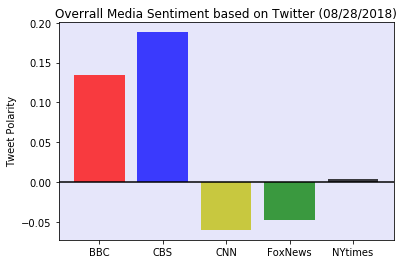

In [13]:
fig = plt.figure()
ax = fig.add_subplot(111)
x_axis = np.arange(0, len(Compound_mean_df["index"]))
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.4)
ax.bar(x_axis, Compound_mean_df["Compound"], alpha=0.75, color="rbygk", align="edge")    

ax.set_ylabel('Tweet Polarity')
ax.set_title("Overrall Media Sentiment based on Twitter (08/28/2018)")
ax.set_facecolor('lavender')
plt.xticks(tick_locations, Compound_mean_df["index"])
plt.axhline(0, color='k')
plt.savefig("Overrall_Media_Sentiment_based_on_Twitter_08_28_2018")
plt.show()